<a href="https://colab.research.google.com/github/chayvw18/Statistics-Practice-Workbook/blob/main/TTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
%cd /content/drive/MyDrive/GLI-2025

/content/drive/MyDrive/GLI-2025


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats

In [56]:
emp_perf = pd.read_csv('/content/drive/MyDrive/GLI-2025/employee_performance_dataset.csv')

In [57]:
emp_perf.head()

,Age,YearsExperience,Department,Education,Salary,PerformanceScore,Promotion,Sales,CustomerSatisfaction
0,50,31,Operations,Masters,87185,75,No,171,5
1,36,17,Operations,Bachelors,56858,98,Yes,189,1
2,29,7,Procurement,Masters,51223,51,No,115,3
3,42,20,Procurement,Bachelors,69375,74,No,159,3
4,40,18,Logistics,PhD,77302,52,No,248,3


In [58]:
emp_perf.tail()

,Age,YearsExperience,Department,Education,Salary,PerformanceScore,Promotion,Sales,CustomerSatisfaction
495,59,36,Operations,Bachelors,84434,78,Yes,172,3
496,28,4,Sales,Bachelors,38637,59,No,245,4
497,34,16,Operations,High School,54317,67,No,225,4
498,30,8,Operations,Bachelors,47467,77,Yes,255,4
499,48,25,Logistics,Bachelors,68840,84,Yes,272,1


In [6]:
emp_perf.isnull().sum()

,0
Age,0
YearsExperience,0
Department,0
Education,0
Salary,0
PerformanceScore,0
Promotion,0
Sales,0
CustomerSatisfaction,0


In [7]:
emp_perf.describe()

,Age,YearsExperience,Salary,PerformanceScore,Sales,CustomerSatisfaction
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,41.322000,20.316000,63559.176000,74.772000,225.960000,3.428000
std,11.051633,11.303791,16949.648484,14.408165,68.990563,1.139919
min,22.000000,0.000000,19846.000000,50.000000,49.000000,1.000000
25%,32.000000,10.000000,49405.000000,62.000000,180.000000,3.000000
50%,43.000000,21.000000,65215.500000,75.000000,221.000000,3.000000
75%,51.000000,30.000000,76970.500000,87.000000,262.250000,4.000000
max,59.000000,40.000000,102957.000000,99.000000,441.000000,5.000000


In [18]:
empSalaryMean = np.round(emp_perf['Salary'].mean(), 2)
print(f'The mean for employeee Salary is ${empSalaryMean}')

The mean for employeee Salary is $63559.18


In [19]:
empSalaryMedian = emp_perf['Salary'].median()
print(f'The median for employeee Salary is ${empSalaryMedian}')

The mean for employeee Salary is $65215.5


In [11]:
empSalaryVar = emp_perf['Salary'].var()
empSalaryVar

287290583.728481

In [21]:
empSalaryStd = np.round(emp_perf['Salary'].std(), 2)
print(f'The standard deviation for employeee Salary is ${empSalaryStd}')

The mean for employeee Salary is $16949.65


In [23]:
empSalaryRange = emp_perf['Salary'].max() - emp_perf['Salary'].min()
print(f'The range for employeee Salary is ${empSalaryRange}')

The range for employeee Salary is $83111


In [25]:
empSalaryIQR = stats.iqr(emp_perf['Salary'])
print(f'The IQR for employeee Salary is ${empSalaryIQR}')

The IQR for employeee Salary is $27565.5


Takeaways from these descriptive statistics is that there is a standard deviation around 16k from the mean which is $63559. Most values fall within the range of 46k and 80k in regards to employee salaries

We want to test whether employees who have been promoted are earning significantly different salaries than those who have not

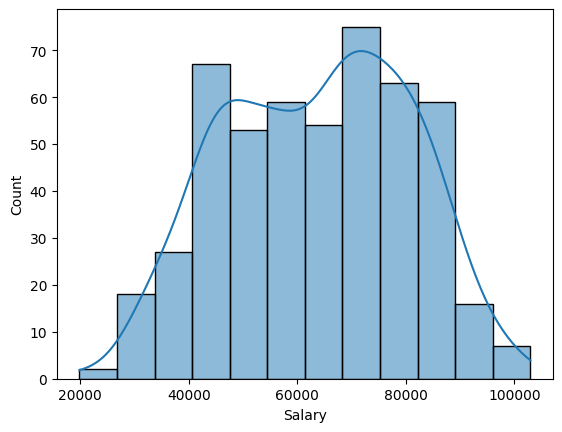

In [28]:
sns.histplot(emp_perf['Salary'], kde=True);

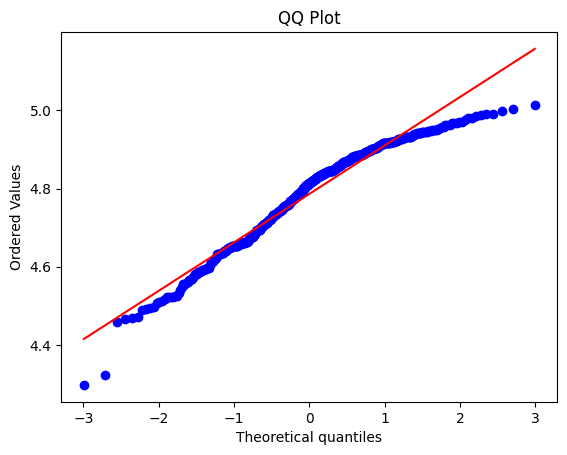

In [66]:
stats.probplot(emp_perf['Salarylog10'], dist='norm', plot=plt)
plt.title('QQ Plot')
plt.show()

In [67]:
stat, p = stats.shapiro(emp_perf['Salarylog10'])
print(f'The W statisitc is {stat} and the p-value and {p}')

The W statisitc is 0.958086036549905 and the p-value and 1.0028382317059437e-10


With the W statistic being 0.98 and close to 1 indicates the degree of normality but with the pvalue at 1.002 we reject normality. Possible option to reduce number of sample size

In [50]:
# group_yes = emp_perf[emp_perf['Promotion']== 'Yes']['Salary']
# group_no = emp_perf[emp_perf['Promotion']== 'No']['Salary']

In [60]:
emp_perf['Salarylog10'] = np.log10(emp_perf['Salary'])

In [61]:
group_yes = emp_perf[emp_perf['Promotion']== 'Yes']['Salarylog10']
group_no = emp_perf[emp_perf['Promotion']== 'No']['Salarylog10']

In [68]:
t, p = stats.ttest_ind(group_yes, group_no, equal_var=False)
print(t)
print('')
print(p)

0.96261613089919

0.3362684605651388


In [65]:
U, p = stats.mannwhitneyu(group_yes, group_no)
print(p)

0.4275790122230603


Based on the data analyzed, we do not have strong evidence that the two groups are different. It is possible that they are but with the current data we can’t say confidently.